In [1]:
#Assignment 6

import pandas as pd
projectid = "my-first-project-366013"
sql = """
SELECT * FROM `bigquery-public-data.world_bank_global_population.population_by_country` 
"""
df_raw = pd.read_gbq(sql,projectid)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=5uxEk0G8jI9xR6xdl0dAbo1izxiMdi&prompt=consent&access_type=offline


In [8]:
df_tr = df_raw.T
df_tr.columns = df_tr.iloc[0]
df_tr = df_tr.drop(df_tr.index[[0,1]])

df_tr.reset_index(inplace=True)
df_tr.columns.name = None
df_tr = df_tr.rename(columns = {'index':'year'})
df_tr['year'] = pd.to_numeric(df_tr['year'].str[5:9])
df_tr.drop(df_tr.tail(1).index,inplace=True) 
df_tr.tail()

,year,Sint Maarten (Dutch part),Not classified,West Bank and Gaza,Serbia,Cambodia,United Arab Emirates,Cyprus,Lower middle income,Maldives,...,Virgin Islands (U.S.),Greenland,Uganda,"Gambia, The",Romania,Northern Mariana Islands,St. Kitts and Nevis,Bolivia,French Polynesia,Slovak Republic
54,2014,37685,<NA>,4173398,7130576,15274503,9214175,1152285,2856124025,435015,...,107884,56295,36912148,2024042,19908979,55305,50774,10706517,271705,5418649
55,2015,38825,<NA>,4270092,7095383,15521436,9262900,1160985,2898058449,454915,...,107710,56114,38225453,2085860,19815481,55780,51203,10869730,273124,5423801
56,2016,39969,<NA>,4367088,7058322,15766293,9360980,1170187,2939830821,475513,...,107510,56186,39647506,2149139,19702332,56188,51625,11031813,274575,5430798
57,2017,40574,<NA>,4454805,7020858,16009414,9487203,1179680,2981420591,496402,...,107268,56171,41162465,2213894,19587491,56562,52045,11192854,276103,5439232
58,2018,40654,<NA>,4569087,6982084,16249798,9630959,1189265,3022905169,515696,...,106977,56025,42723139,2280102,19473936,56882,52441,11353142,277679,5447011


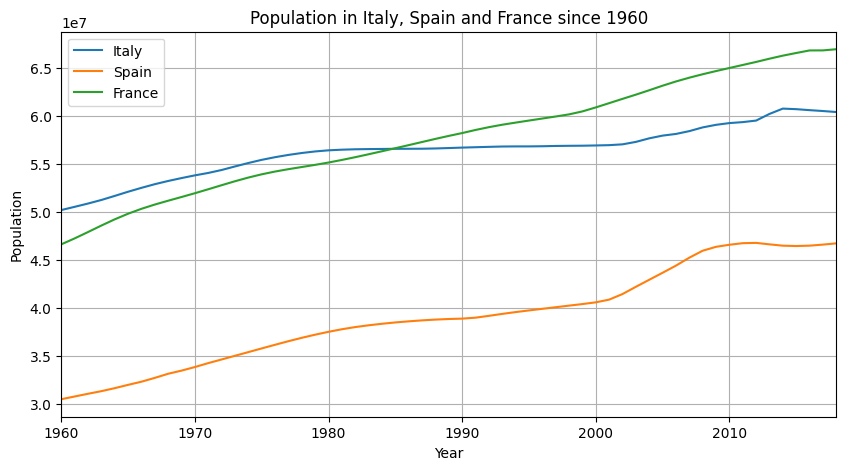

In [25]:
# Draw a line plot of the population in Italy, Spain and France since 1960
import matplotlib.pyplot as plt

fig, ax = plt.subplots(num=None, figsize=(10,5), dpi=100, facecolor="w")
plt.plot(df_tr['year'], df_tr['Italy'], label = "Italy")
plt.plot(df_tr['year'], df_tr['Spain'], label = "Spain")
plt.plot(df_tr['year'], df_tr['France'], label = "France")
plt.title('Population in Italy, Spain and France since 1960')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
ax.set_xlim([1960, 2018])
plt.show()

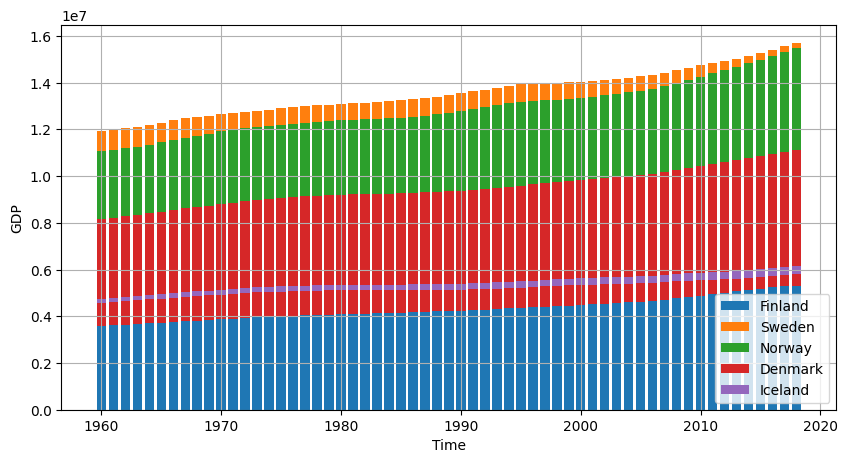

In [35]:
# Draw a stacked bar plot of the population in Nordic countries (Finland, Sweden, Norway, Denmark, Iceland) since 1960. Pay attention to data visualization, like colours, axes, titles, labels etc.

plt.figure(num=None, figsize=(10,5), dpi=100, facecolor="w")
plt.bar(df_tr['year'], df_tr['Finland'])
plt.bar(df_tr['year'], df_tr['Sweden'], bottom=df_tr['Finland'])
plt.bar(df_tr['year'], df_tr['Norway'], bottom=df_tr['Sweden'])
plt.bar(df_tr['year'], df_tr['Denmark'], bottom=df_tr['Norway'])
plt.bar(df_tr['year'], df_tr['Iceland'], bottom=df_tr['Denmark'])
plt.legend(['Finland', 'Sweden', 'Norway', 'Denmark', 'Iceland'])
plt.xlabel('Time')
plt.ylabel('GDP')
plt.grid(True)
ax.set_xlim([1960, 2018])
plt.show()